# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     799.4
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           1.13e-39
Time:                        18:45:46   Log-Likelihood:                -3.5427
No. Observations:                  50   AIC:                             15.09
Df Residuals:                      46   BIC:                             22.73
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9253      0.092     53.363      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.40188168  4.91785529  5.38996832  5.78739625  6.09043897  6.29375745
  6.40725094  6.45443051  6.46855629  6.4871729   6.545941    6.67277832
  6.88327285  7.17812181  7.54301709  7.95099599  8.36687118  8.75301183
  9.07552627  9.30983029  9.44468626  9.48404944  9.44641813  9.36179447
  9.26675517  9.19844203  9.18845972  9.25768312  9.41282773  9.64534627
  9.93283302 10.24270497 10.53755516 10.7812985  10.94510047 11.01211457
 10.98025008 10.86251566 10.68488197 10.48201483 10.29157969 10.14805332
 10.07705935 10.09115841 10.18778445 10.3496663  10.54766532 10.74556278
 10.90601046 10.99666693]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.98146952 10.81776493 10.52773371 10.16192255  9.78686866  9.46880917
  9.25746396  9.17386246  9.205195    9.30794896]


## Plot comparison

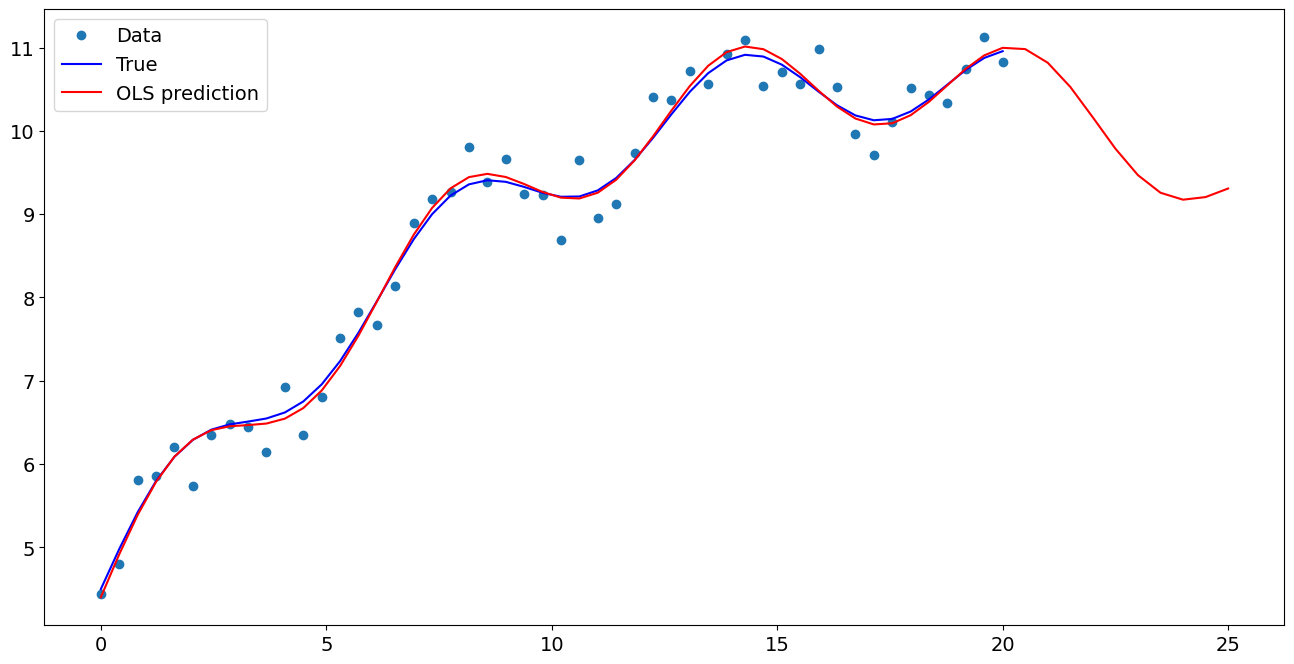

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.925303
x1                  0.513290
np.sin(x1)          0.565597
I((x1 - 5) ** 2)   -0.020937
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.981470
1    10.817765
2    10.527734
3    10.161923
4     9.786869
5     9.468809
6     9.257464
7     9.173862
8     9.205195
9     9.307949
dtype: float64